### Objectives
* Introduction to Embedded Methods
* Advantages
* Process
* Introduction to Hybrid Methods
* Advantages
* Process

<hr>

#### Introduction to Embedded Methods
* Feature selection happens during model training that's why called embedded methods

#### Advantages
* Feature interaction with target is considered. ( advantage of wrapper based methods )
* Fast like filter based methods.
* More accurate than filter based methods.
* Less prone to overfitting

#### Process of applying Embedded Methods
* First these methods train machine learning models
* They then derive feature importances from the trained model.
* And, finally removing non-important features

### Methods
* Regularization Based
* Tree Based

#### Regularization based
* Using regularization technique, the learned weights (w0, w1, ...) are threasholded so that their individual impact on the prediction is reduced.
* By tapping down feature, it makes sure that some specific features don't become over important.

In [6]:
#Regularization in Linear Regression Models
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

In [13]:
import pandas as pd
data = pd.DataFrame([[0,0,0],[0,0,.1],[1,1,1]], columns=['A','B','Y'])

In [14]:
data

,A,B,Y
0,0,0,0.0
1,0,0,0.1
2,1,1,1.0


In [16]:
lasso = Lasso(alpha=.1)

lasso.fit(data[['A','B']], data.Y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
lasso.coef_

array([0.5, 0. ])

In [8]:
lr = LinearRegression()

In [18]:
lr.fit(data[['A','B']], data.Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lr.coef_

array([0.475, 0.475])

* PS : Feature Selection is happening as a part of model training

Panelty calculation needs to be understood
* L1 regularization  - shrinks come of the coefs to zero thus suited for feature selection - Lasso
* L2 regularization  - it does't set weights to be zero - Ridge

In [19]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(penalty='l1')

* PS : This is how you achieve feature selection in embedding method for LogisticRegression

#### Tree Based feature importances
* Tree based models like randomforest
* Let's understand RandomForest for a while

#### RandomForest
* Base understanding, train empty trees with different subset of data. And, it will generate different trees.
* For doing the prediction (classification), all the participating trees predict. And, majority decides the prediction.
* These composition of trees is known as RandomForest

In [23]:
from sklearn.datasets import load_digits

In [24]:
digits = load_digits()

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

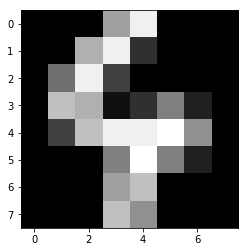

In [34]:
plt.imshow(digits.images[110], cmap='gray')

In [31]:
digits.data[110]

array([ 0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  3.,
        0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12.,
       11.,  1.,  3.,  8.,  2.,  0.,  0.,  4., 12., 15., 15., 16.,  9.,
        0.,  0.,  0.,  0.,  8., 16.,  8.,  2.,  0.,  0.,  0.,  0., 10.,
       12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.])

In [32]:
digits.target[110]

4

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [38]:
dt = DecisionTreeClassifier()

In [39]:
dt.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
dt.score(testX, testY)

0.8622222222222222

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [48]:
rf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [49]:
rf.score(testX, testY)

0.9777777777777777

In [50]:
import numpy as np
np.round(rf.feature_importances_,2)

array([0.  , 0.  , 0.02, 0.01, 0.01, 0.02, 0.01, 0.  , 0.  , 0.01, 0.03,
       0.01, 0.02, 0.03, 0.01, 0.  , 0.  , 0.01, 0.02, 0.03, 0.03, 0.05,
       0.01, 0.  , 0.  , 0.01, 0.04, 0.02, 0.03, 0.02, 0.03, 0.  , 0.  ,
       0.03, 0.03, 0.02, 0.04, 0.02, 0.03, 0.  , 0.  , 0.01, 0.04, 0.04,
       0.02, 0.02, 0.02, 0.  , 0.  , 0.  , 0.02, 0.02, 0.01, 0.02, 0.02,
       0.  , 0.  , 0.  , 0.02, 0.01, 0.02, 0.03, 0.02, 0.  ])

### Introduction to Hybrid Methods
* Rather than using a single approch to do feature subset select, hybrid methods as the names combine different approaches to get best possible feature subset.
* It's like starting with filter based methods to remove contant of similar data.
* Followed by using wrapper based methods

#### Advantages
* High accuracy models
* Robust models

#### Process
* Using Filter & Wrapper methods
  - using f_classif choose some important features. (reduces the feature space) 100 - 75
  - using SequentialFeatureSelector get top features from the selected ones 75-25
  
* Using Embedded & Wrapper methods
  - Lasso for identifying importnat features or decision tree.
  - Choosing top 50% features & applying wrapper methods

### A fancy way of naming the above things
* reducing the feature dimension using incremental techniques

In [51]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep=';')
def f(r):
    if r <= 3:
        return 1
    elif r<= 6:
        return 2
    else:
        return 3

df.quality = df.quality.map(f)

In [52]:
features = list(df.columns.values)

In [53]:
features.remove('quality')

In [54]:
dt = DecisionTreeClassifier()

In [57]:
dt.fit(df[features], df.quality)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
fi = pd.Series(dt.feature_importances_, index=features)

In [66]:
top5 = list(fi.sort_values(ascending=False)[:5].index)

In [67]:
feature_data = df[top5]

In [68]:
rf = RandomForestClassifier(n_estimators=1000)

In [69]:
trainX, testX, trainY, testY = train_test_split(feature_data, df.quality)

In [70]:
rf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
rf.score(testX, testY)

0.856326530612245

### Some reading assignments
* Probability Basics & Conditional Probability
* https://developers.google.com/machine-learning/guides/good-data-analysis
* https://developers.google.com/machine-learning/guides/rules-of-ml

### Next topic
* Naive Bayes